In [204]:
# Importing the modules
from glob import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Getting the list of csv

In [205]:
glob('dataset/*.csv')

['dataset\\dengue_features_test.csv',
 'dataset\\dengue_features_train.csv',
 'dataset\\dengue_labels_train.csv']

### Reading the Dataset

In [206]:
dengue_features = pd.read_csv('dataset/dengue_features_train.csv')
dengue_labels = pd.read_csv('dataset/dengue_labels_train.csv')

print('{:>26} {:>11}'.format('Rows', 'Columns'))

print('Dengue Features' + '{:>11} {:>8}'.format(dengue_features.shape[0], dengue_features.shape[1]))

print('Dengue Labels' + '{:>13} {:>8}'.format(dengue_labels.shape[0], dengue_labels.shape[1]))

                      Rows     Columns
Dengue Features       1456       24
Dengue Labels         1456        4


In [207]:
dengue_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,ag,1999,18,4/30/1999,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,ag,1999,19,5/7/1999,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,ag,1999,20,5/14/1999,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,ag,1999,21,5/21/1999,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,ag,1999,22,5/28/1999,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [208]:
dengue_labels.head()

,city,year,weekofyear,total_cases
0,ag,1999,18,4
1,ag,1999,19,5
2,ag,1999,20,4
3,ag,1999,21,3
4,ag,1999,22,6


### Custimizing the plot

In [209]:
plt.style.use('seaborn') # Setting plot style

plt.rcParams['figure.figsize'] = [10, 8] # Setting plot size

### Finding the year that has maximum cases of dengue

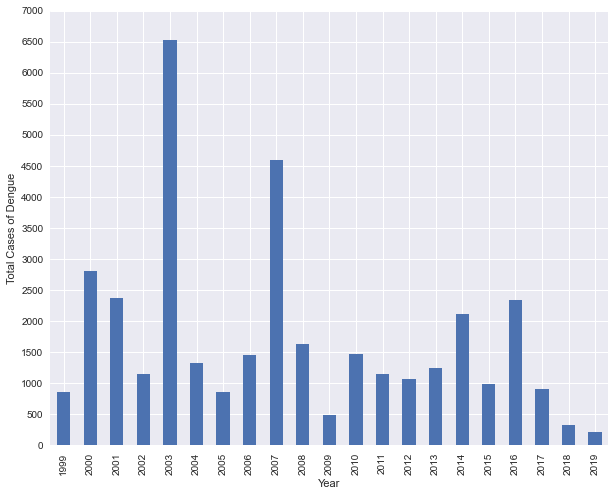

In [210]:
year_max_cases = dengue_labels.groupby(['year'])['total_cases'].agg('sum')

#Visualizing it
year_max_cases.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Total Cases of Dengue')
plt.yticks(np.arange(0,7500, step=500))
plt.show()

So, Year 2003 faced maximum cases of dengue

### City that has maximum cases of dengue

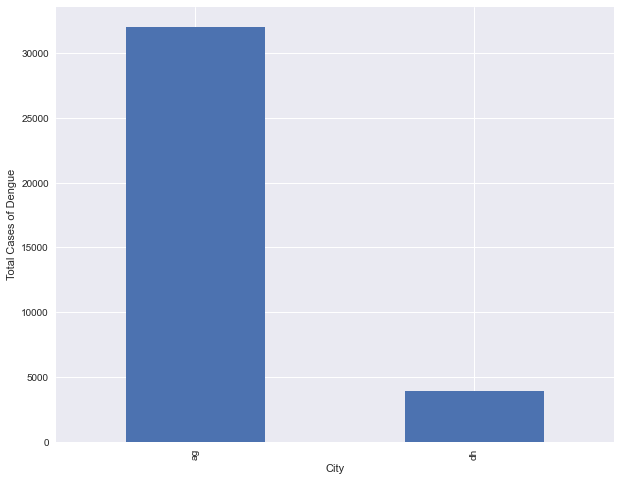

In [211]:
city_affected = dengue_labels.groupby(['city'])['total_cases'].agg('sum')

city_affected.plot(kind='bar')
plt.rcParams['figure.figsize'] = [5, 5]
plt.xlabel('City')
plt.ylabel('Total Cases of Dengue')
plt.show()

**Agartala** has maximum cases of dengue

## Data Preprocessing

### 1. Checking null entries

In [212]:
dengue_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [213]:
# Checking columns having null values
dengue_features.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [214]:
# Getting the list of columns having missing values
x = dengue_features.columns[dengue_features.isna().sum() > 0].tolist()
x

['ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm']

In [215]:
# Filling the missing value with mean
for i in x:
    dengue_features[i] = dengue_features[i].fillna(dengue_features[i].mean())

#### Converting all the temperatures from Kelvin to Centigrade

In [216]:
temperature_kelvin_columns = [i for i in dengue_features.columns if i.find('_temp_k') > -1]
temperature_kelvin_columns

['reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k']

In [217]:
for i in temperature_kelvin_columns:
    dengue_features[i] = dengue_features[i] - 273.15

In [218]:
# Changing the column names from _temp_k to _temp_c
dengue_features.columns = [i.replace('_temp_k', '_temp_c') 
                           for i in dengue_features.columns if i.find('_temp_k')]

### 2. Rounding every value upto 3 decimal places

In [219]:
dengue_features = dengue_features.round(3)

dengue_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_c,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,ag,1999,18,4/30/1999,0.123,0.104,0.198,0.178,12.42,24.423,...,32.00,73.366,12.42,14.013,2.629,25.443,6.900,29.4,20.0,16.0
1,ag,1999,19,5/7/1999,0.170,0.142,0.162,0.155,22.82,25.061,...,17.94,77.369,22.82,15.373,2.371,26.714,6.371,31.7,22.2,8.6
2,ag,1999,20,5/14/1999,0.032,0.173,0.157,0.171,34.54,25.631,...,26.10,82.053,34.54,16.849,2.300,26.714,6.486,32.2,22.8,41.4
3,ag,1999,21,5/21/1999,0.129,0.245,0.228,0.236,15.36,25.837,...,13.90,80.337,15.36,16.673,2.429,27.471,6.771,33.3,23.3,4.0
4,ag,1999,22,5/28/1999,0.196,0.262,0.251,0.247,7.52,26.369,...,12.20,80.460,7.52,17.210,3.014,28.943,9.371,35.0,23.9,5.8


#### Combining station_max_temp_c and station_min_temp_c as `avg_station_max_min`

In [220]:
dengue_features['avg_station_max_min'] = (dengue_features['station_max_temp_c'] + 
                                          dengue_features['station_min_temp_c']) / 2

dengue_features['avg_station_max_min'].head()

0    24.70
1    26.95
2    27.50
3    28.30
4    29.45
Name: avg_station_max_min, dtype: float64

#### Combining reanalysis_max_air_temp_c and reanalysis_min_air_temp_c as `avg_analysis_max_min`

In [221]:
dengue_features['avg_analysis_max_min'] = (dengue_features['reanalysis_max_air_temp_c'] + 
                                           dengue_features['reanalysis_min_air_temp_c']) / 2

dengue_features['avg_analysis_max_min'].head()

0    24.70
1    25.50
2    25.75
3    26.05
4    26.55
Name: avg_analysis_max_min, dtype: float64

In [222]:
# Adding total cases
dengue_features['total_cases'] = dengue_labels['total_cases']

In [223]:
# Summary statistics
dengue_features.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_c,reanalysis_avg_temp_c,reanalysis_dew_point_temp_c,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,avg_station_max_min,avg_analysis_max_min,total_cases
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,2010.031593,26.503434,0.142253,0.130573,0.203793,0.202304,45.760385,25.551865,26.075588,22.096353,...,16.746426,4.903755,27.185795,8.059324,32.452431,22.102148,39.326354,27.277290,26.423132,24.675137
std,5.408314,15.019437,0.130832,0.117847,0.073298,0.083268,43.519806,1.357720,1.257382,1.522545,...,1.537181,3.534244,1.273107,2.096867,1.945806,1.566475,47.095179,1.331498,1.325096,43.596000
min,1999.000000,1.000000,-0.406000,-0.456000,-0.016000,-0.063000,0.000000,21.486000,21.743000,16.493000,...,11.716000,1.357000,21.400000,4.529000,26.700000,14.700000,0.000000,22.800000,22.650000,0.000000
25%,2006.000000,13.750000,0.055750,0.051000,0.156000,0.145000,9.960000,24.515250,25.114000,20.980500,...,15.561000,2.329000,26.329000,6.529000,31.100000,21.100000,8.850000,26.400000,25.400000,5.000000
50%,2011.000000,26.500000,0.142000,0.128000,0.197000,0.191000,38.710000,25.512000,26.117500,22.476000,...,17.065000,2.864000,27.386000,7.386000,32.800000,22.200000,24.450000,27.500000,26.500000,12.000000
75%,2014.000000,39.250000,0.229250,0.212250,0.247000,0.246250,70.047500,26.677500,27.057000,23.306250,...,17.974500,7.553750,28.129000,9.500000,33.900000,23.300000,53.600000,28.300000,27.400000,28.000000
max,2019.000000,53.000000,0.508000,0.454000,0.538000,0.546000,390.600000,29.050000,29.779000,25.300000,...,20.461000,16.029000,30.800000,15.800000,42.200000,25.600000,543.300000,32.000000,31.250000,461.000000


## Exploratory Data Analysis

In [224]:
# Setting plot size
plt.rcParams['figure.figsize'] = [12, 12]

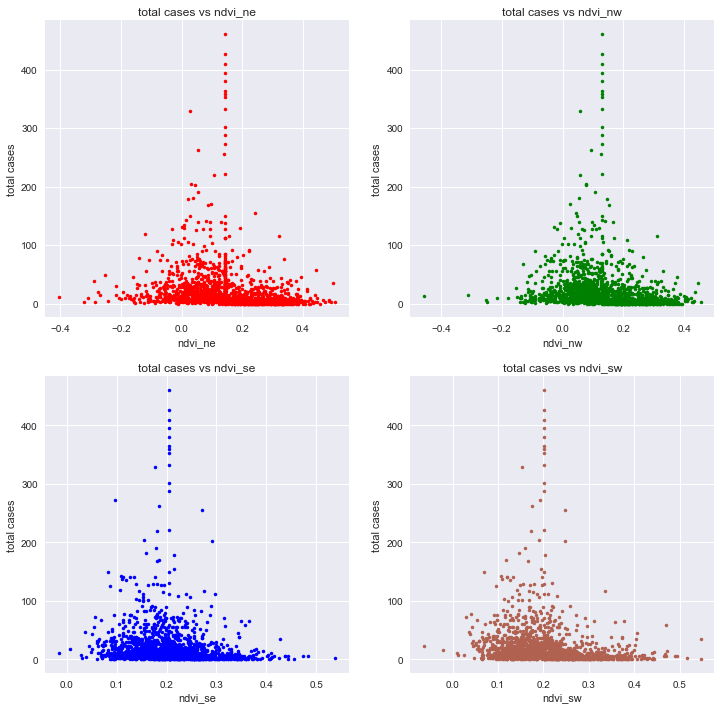

In [225]:
# ndvi_ne
plt.subplot(2, 2, 1)
plt.plot(dengue_features[x[0]], dengue_features['total_cases'], 
         marker='.', linestyle='none', color='red')
plt.xlabel(x[0])
plt.ylabel('total cases')
plt.title('total cases vs ' + x[0])

# ndvi_nw
plt.subplot(2, 2, 2)
plt.plot(dengue_features[x[1]], dengue_features['total_cases'], 
         marker='.', linestyle='none', color='green')
plt.xlabel(x[1])
plt.ylabel('total cases')
plt.title('total cases vs ' + x[1])

# ndvi_se
plt.subplot(2, 2, 3)
plt.plot(dengue_features[x[2]], dengue_features['total_cases'], 
         marker='.', linestyle='none', color='blue')
plt.xlabel(x[2])
plt.ylabel('total cases')
plt.title('total cases vs ' + x[2])

# ndvi_sw
plt.subplot(2, 2, 4)
plt.plot(dengue_features[x[3]], dengue_features['total_cases'], 
         marker='.', linestyle='none', color='#B16150')
plt.xlabel(x[3])
plt.ylabel('total cases')
plt.title('total cases vs ' + x[3])
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


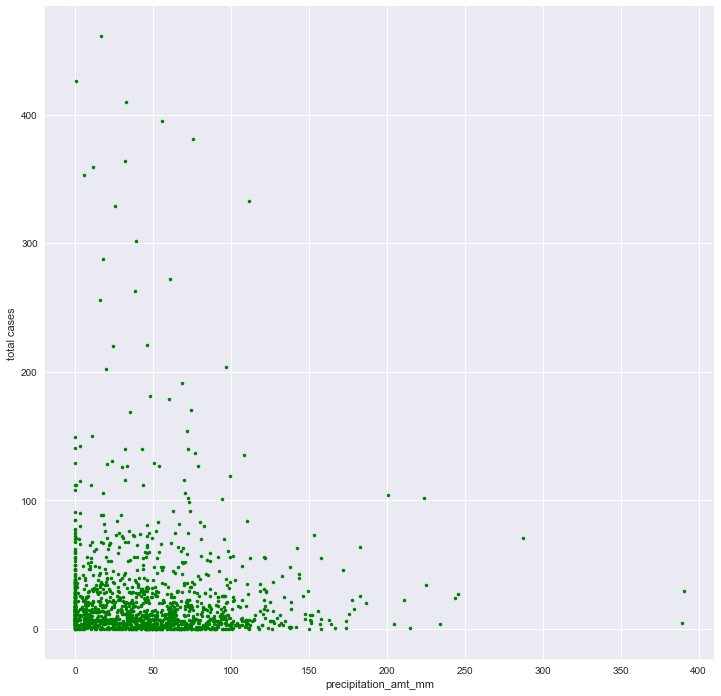

In [226]:
plt.plot(dengue_features[x[4]], dengue_features['total_cases'], 
         marker='.', linestyle='none', color='green')
plt.xlabel(x[4])
plt.ylabel('total cases')
plt.legend()
plt.show()

## Feature Engineering

### 3. The dengue cases of Agartala `ag`  and  Dharmanagar `dh` are not dependent. So splitting them into different DataFrames

In [227]:
X_ag = dengue_features[dengue_features['city'] == 'ag']
X_dh = dengue_features[dengue_features['city'] == 'dh']

In [228]:
X_ag = X_ag.drop(['city', 'weekofyear', 'week_start_date'], axis=1)
X_dh = X_dh.drop(['city', 'weekofyear', 'week_start_date'], axis=1)

In [229]:
one_hot_ag = pd.get_dummies(X_ag['year'])
X_ag = X_ag.drop('year', axis=1)
X_ag = X_ag.join(one_hot_ag)

In [230]:
one_hot_dh = pd.get_dummies(X_dh['year'])
X_dh = X_dh.drop('year', axis=1)
X_dh = X_dh.join(one_hot_dh)

### 4. Changing the order of columns in X_ag and X_dh DataFrames

In [231]:
years = X_ag.columns[:23:-1].values.tolist()
X_ag = X_ag[years[::-1]].join(X_ag[X_ag.columns[:24]])
X_ag.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,avg_station_max_min,avg_analysis_max_min,total_cases,1999
0,0,0,0,0,0,0,0,0,0,0,...,2.629,25.443,6.900,29.4,20.0,16.0,24.70,24.70,4,1
1,0,0,0,0,0,0,0,0,0,0,...,2.371,26.714,6.371,31.7,22.2,8.6,26.95,25.50,5,1
2,0,0,0,0,0,0,0,0,0,0,...,2.300,26.714,6.486,32.2,22.8,41.4,27.50,25.75,4,1
3,0,0,0,0,0,0,0,0,0,0,...,2.429,27.471,6.771,33.3,23.3,4.0,28.30,26.05,3,1
4,0,0,0,0,0,0,0,0,0,0,...,3.014,28.943,9.371,35.0,23.9,5.8,29.45,26.55,6,1


In [232]:
years = X_dh.columns[:23:-1].values.tolist()
X_dh = X_dh[years[::-1]].join(X_dh[X_dh.columns[:24]])
X_dh.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,...,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,avg_station_max_min,avg_analysis_max_min,total_cases,2009
936,0,0,0,0,0,0,0,0,0,0,...,8.929,26.400,10.775,32.5,20.7,3.0,26.60,27.05,0,1
937,0,0,0,0,0,0,0,0,0,0,...,10.314,26.900,11.567,34.0,20.8,55.6,27.40,25.70,0,1
938,0,0,0,0,0,0,0,0,0,0,...,7.386,26.800,11.467,33.0,20.7,38.1,26.85,25.40,0,1
939,0,0,0,0,0,0,0,0,0,0,...,9.114,25.767,10.533,31.5,14.7,30.0,23.10,22.95,0,1
940,0,0,0,0,0,0,0,0,0,0,...,9.500,26.600,11.480,33.3,19.1,4.0,26.20,26.10,0,1


In [233]:
# Removing dummy variable trap
X_ag = X_ag.drop(1999, axis=1)
X_dh = X_dh.drop(2009, axis=1)

In [234]:
x_ag_arr = X_ag.iloc[:].values
x_dh_arr = X_dh.iloc[:].values

In [235]:
# np.random.seed(23)
np.random.shuffle(x_ag_arr)
np.random.shuffle(x_dh_arr)

### 5. Splitting the dataframes into train and test

In [236]:
from sklearn.model_selection import train_test_split

X_ag_train, X_ag_test, y_ag_train, y_ag_test = train_test_split(x_ag_arr[:, :-1], x_ag_arr[:, -1], test_size=0.2)
X_dh_train, X_dh_test, y_dh_train, y_dh_test = train_test_split(x_dh_arr[:, :-1], x_dh_arr[:, -1], test_size=0.2)

### 6. Applying Feature Scaling

In [237]:
from sklearn.preprocessing import StandardScaler

ag_scaler = StandardScaler()
X_ag_train = ag_scaler.fit_transform(X_ag_train)
X_ag_test = ag_scaler.transform(X_ag_test)

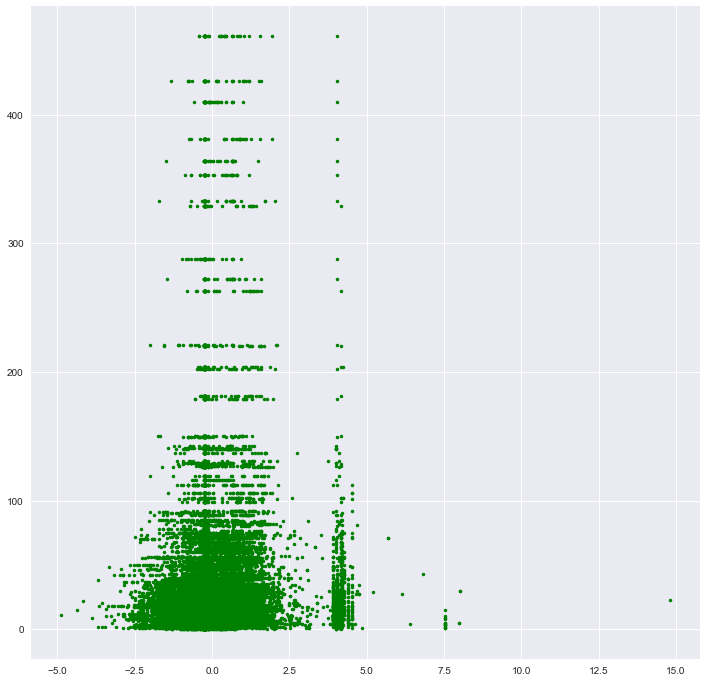

In [238]:
plt.plot(X_ag_train, y_ag_train, marker='.', color='green', linestyle='none')
plt.show()

### Time for modelling

1. KNeighborsRegressor

In [239]:
from sklearn.neighbors import KNeighborsRegressor

ag_knn = KNeighborsRegressor(n_neighbors=5)

ag_knn.fit(X_ag_train, y_ag_train)

KNeighborsRegressor()

In [240]:
y_ag_pred = ag_knn.predict(X_ag_test)

In [241]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculating the prediction accuracy
mae=mean_absolute_error(y_ag_test, y_ag_pred)
mse = mean_squared_error(y_ag_test, y_ag_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_ag_test, y_ag_pred)

# Print the results
print("Mean Absolute Error: {:.2f}".format(mae))
print("Mean Squared Error: {:.2f}".format(mse))
print("Root Mean Squared Error: {:.2f}".format(rmse))
print("R2 Score: {:.2f}".format(r2))

Mean Absolute Error: 18.46
Mean Squared Error: 1213.57
Root Mean Squared Error: 34.84
R2 Score: 0.59


In [242]:
dh_scaler = StandardScaler()
X_dh_train = dh_scaler.fit_transform(X_dh_train)
X_dh_test = dh_scaler.transform(X_dh_test)

In [243]:
dh_knn = KNeighborsRegressor(n_neighbors=5)

dh_knn.fit(X_dh_train, y_dh_train)

KNeighborsRegressor()

In [244]:
y_dh_pred = dh_knn.predict(X_dh_test)

In [245]:
# Calculating the prediction accuracy
mae=mean_absolute_error(y_dh_test, y_dh_pred)
mse = mean_squared_error(y_dh_test, y_dh_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_dh_test, y_dh_pred)

# Print the results
print("Mean Absolute Error: {:.2f}".format(mae))
print("Mean Squared Error: {:.2f}".format(mse))
print("Root Mean Squared Error: {:.2f}".format(rmse))
print("R2 Score: {:.2f}".format(r2))


Mean Absolute Error: 4.84
Mean Squared Error: 88.52
Root Mean Squared Error: 9.41
R2 Score: 0.27


2. RandomForestRegressor

In [246]:
from sklearn.ensemble import RandomForestRegressor

ag_ada = RandomForestRegressor(n_estimators=50, max_depth=15)
ag_ada.fit(X_ag_train, y_ag_train)

y_ag_pred = ag_ada.predict(X_ag_test)

# Calculating the prediction accuracy
mae=mean_absolute_error(y_ag_test, y_ag_pred)
mse = mean_squared_error(y_ag_test, y_ag_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_ag_test, y_ag_pred)

# Print the results
print("Mean Absolute Error: {:.2f}".format(mae))
print("Mean Squared Error: {:.2f}".format(mse))
print("Root Mean Squared Error: {:.2f}".format(rmse))
print("R2 Score: {:.2f}".format(r2))

Mean Absolute Error: 19.49
Mean Squared Error: 1219.53
Root Mean Squared Error: 34.92
R2 Score: 0.59


In [247]:
dh_ada = RandomForestRegressor(n_estimators=50, max_depth=15)
dh_ada.fit(X_dh_train, y_dh_train)

y_dh_pred = dh_ada.predict(X_dh_test)

# Calculating the prediction accuracy
mae=mean_absolute_error(y_dh_test, y_dh_pred)
mse = mean_squared_error(y_dh_test, y_dh_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_dh_test, y_dh_pred)

# Print the results
print("Mean Absolute Error: {:.2f}".format(mae))
print("Mean Squared Error: {:.2f}".format(mse))
print("Root Mean Squared Error: {:.2f}".format(rmse))
print("R2 Score: {:.2f}".format(r2))

Mean Absolute Error: 5.66
Mean Squared Error: 96.33
Root Mean Squared Error: 9.81
R2 Score: 0.20


3. Support Vector regression

In [248]:
from sklearn.svm import SVR

# Create a Support Vector regression model
ag_svr = SVR(kernel='linear', C=1.0)

# Train the model on the training data
ag_svr.fit(X_ag_train, y_ag_train)

# Use the model to make predictions on the test data
y_ag_pred = ag_svr.predict(X_ag_test)

# Evaluate the model's accuracy
mae=mean_absolute_error(y_ag_test, y_ag_pred)
mse = mean_squared_error(y_ag_test, y_ag_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_ag_test, y_ag_pred)

# Print the results
print("Mean Absolute Error: {:.2f}".format(mae))
print("Mean Squared Error: {:.2f}".format(mse))
print("Root Mean Squared Error: {:.2f}".format(rmse))
print("R2 Score: {:.2f}".format(r2))

Mean Absolute Error: 20.16
Mean Squared Error: 2469.59
Root Mean Squared Error: 49.69
R2 Score: 0.16


In [249]:
# Create a Support Vector regression model
dh_svr = SVR(kernel='linear', C=1.0)

# Train the model on the training data
dh_svr.fit(X_dh_train, y_dh_train)

# Use the model to make predictions on the test data
y_dh_pred = dh_svr.predict(X_dh_test)

# Evaluate the model's accuracy
mae=mean_absolute_error(y_dh_test, y_dh_pred)
mse = mean_squared_error(y_dh_test, y_dh_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_dh_test, y_dh_pred)

# Print the results
print("Mean Absolute Error: {:.2f}".format(mae))
print("Mean Squared Error: {:.2f}".format(mse))
print("Root Mean Squared Error: {:.2f}".format(rmse))
print("R2 Score: {:.2f}".format(r2))

Mean Absolute Error: 4.92
Mean Squared Error: 102.80
Root Mean Squared Error: 10.14
R2 Score: 0.15


4. GradientBoostingRegressor


In [250]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting regression model
ag_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model on the training data
ag_gb.fit(X_ag_train, y_ag_train)

# Use the model to make predictions on the test data
y_ag_pred = ag_gb.predict(X_ag_test)

# Evaluate the model's accuracy
mae=mean_absolute_error(y_ag_test, y_ag_pred)
mse = mean_squared_error(y_ag_test, y_ag_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_ag_test, y_ag_pred)

# Print the results
print("Mean Absolute Error: {:.2f}".format(mae))
print("Mean Squared Error: {:.2f}".format(mse))
print("Root Mean Squared Error: {:.2f}".format(rmse))
print("R2 Score: {:.2f}".format(r2))

Mean Absolute Error: 18.59
Mean Squared Error: 1006.20
Root Mean Squared Error: 31.72
R2 Score: 0.66


In [251]:
# Create a Gradient Boosting regression model
dh_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model on the training data
dh_gb.fit(X_dh_train, y_dh_train)

# Use the model to make predictions on the test data
y_dh_pred = dh_gb.predict(X_dh_test)

# Evaluate the model's accuracy
mae=mean_absolute_error(y_dh_test, y_dh_pred)
mse = mean_squared_error(y_dh_test, y_dh_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_dh_test, y_dh_pred)

# Print the results
print("Mean Absolute Error: {:.2f}".format(mae))
print("Mean Squared Error: {:.2f}".format(mse))
print("Root Mean Squared Error: {:.2f}".format(rmse))
print("R2 Score: {:.2f}".format(r2))

Mean Absolute Error: 5.70
Mean Squared Error: 97.83
Root Mean Squared Error: 9.89
R2 Score: 0.19


5. Artificial Neural Network Regression

In [252]:
from sklearn.neural_network import MLPRegressor

# Create an Artificial Neural Network regression model
ag_ann = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', alpha=0.0001, max_iter=500, random_state=42)

# Train the model on the training data
ag_ann.fit(X_ag_train, y_ag_train)

# Use the model to make predictions on the test data
y_ag_pred = ag_ann.predict(X_ag_test)

# Evaluate the model's accuracy
mae=mean_absolute_error(y_ag_test, y_ag_pred)
mse = mean_squared_error(y_ag_test, y_ag_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_ag_test, y_ag_pred)

# Print the results
print("Mean Absolute Error: {:.2f}".format(mae))
print("Mean Squared Error: {:.2f}".format(mse))
print("Root Mean Squared Error: {:.2f}".format(rmse))
print("R2 Score: {:.2f}".format(r2))

Mean Absolute Error: 22.74
Mean Squared Error: 1285.28
Root Mean Squared Error: 35.85
R2 Score: 0.56


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [253]:
# Create an Artificial Neural Network regression model
dh_ann = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', alpha=0.0001, max_iter=500, random_state=42)

# Train the model on the training data
dh_ann.fit(X_dh_train, y_dh_train)

# Use the model to make predictions on the test data
y_dh_pred = dh_ann.predict(X_dh_test)

# Evaluate the model's accuracy
mae=mean_absolute_error(y_dh_test, y_dh_pred)
mse = mean_squared_error(y_dh_test, y_dh_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_dh_test, y_dh_pred)

# Print the results
print("Mean Absolute Error: {:.2f}".format(mae))
print("Mean Squared Error: {:.2f}".format(mse))
print("Root Mean Squared Error: {:.2f}".format(rmse))
print("R2 Score: {:.2f}".format(r2))

Mean Absolute Error: 6.88
Mean Squared Error: 112.65
Root Mean Squared Error: 10.61
R2 Score: 0.07


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


6. DecisionTreeRegressor

In [254]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree regression model
ag_dt = DecisionTreeRegressor(max_depth=5, random_state=42)

# Train the model on the training data
ag_dt.fit(X_ag_train, y_ag_train)

# Use the model to make predictions on the test data
y_ag_pred = ag_dt.predict(X_ag_test)

# Evaluate the model's accuracy
mae=mean_absolute_error(y_ag_test, y_ag_pred)
mse = mean_squared_error(y_ag_test, y_ag_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_ag_test, y_ag_pred)

# Print the results
print("Mean Absolute Error: {:.2f}".format(mae))
print("Mean Squared Error: {:.2f}".format(mse))
print("Root Mean Squared Error: {:.2f}".format(rmse))
print("R2 Score: {:.2f}".format(r2))

Mean Absolute Error: 23.41
Mean Squared Error: 2420.48
Root Mean Squared Error: 49.20
R2 Score: 0.18


In [255]:
# Create a Decision Tree regression model
dh_dt = DecisionTreeRegressor(max_depth=5, random_state=42)

# Train the model on the training data
dh_dt.fit(X_dh_train, y_dh_train)

# Use the model to make predictions on the test data
y_dh_pred = dh_dt.predict(X_dh_test)

# Evaluate the model's accuracy
mae=mean_absolute_error(y_dh_test, y_dh_pred)
mse = mean_squared_error(y_dh_test, y_dh_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_dh_test, y_dh_pred)

# Print the results
print("Mean Absolute Error: {:.2f}".format(mae))
print("Mean Squared Error: {:.2f}".format(mse))
print("Root Mean Squared Error: {:.2f}".format(rmse))
print("R2 Score: {:.2f}".format(r2))

Mean Absolute Error: 4.95
Mean Squared Error: 97.74
Root Mean Squared Error: 9.89
R2 Score: 0.19


### Tuning the hyperparameter

In [256]:
from sklearn.model_selection import GridSearchCV

knn_parameters = [{'algorithm':['ball_tree'], 'leaf_size':[25]},
                  {'algorithm':['kd_tree'], 'leaf_size':[25]},
                  {'algorithm':['brute']}]

ag_knn_grid_cv = GridSearchCV(estimator=ag_knn, param_grid=knn_parameters,
                              scoring='neg_mean_absolute_error', cv=5)

In [257]:
ag_knn_grid_cv = ag_knn_grid_cv.fit(X_ag_train, y_ag_train)

#ag_knn_grid_cv.predict(X_ag_test)

# mean_absolute_error(y_ag_test, ag_knn_grid_cv.predict(X_ag_test))
print(ag_knn_grid_cv.best_score_)
print(ag_knn_grid_cv.best_params_)

-18.721227740492175
{'algorithm': 'ball_tree', 'leaf_size': 25}
